<a href="https://colab.research.google.com/github/IEXE-Tec/analisis_de_algoritmos/blob/main/05_recursividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recursividad

## Factorial

### Factorial Recursivo

In [5]:
def factorial(n):
  # Caso Base
  if n == 0:
    return 1
  else:
    return n * factorial(n-1)

In [15]:
factorial(3)

6

### Factorial Iterativo

In [10]:
def factorial_it(n):

  if n == 0:
    return 1
  else:
    value = 1
    for i in range(1,n+1):
      value = value*i
    return value

In [13]:
factorial_it(3)

6

## Ejercicios de Recursividad

### Suma-n recursiva

Encuentra una funcion recursiva que dado un valor `n` calcule la suma de los primeros n enteros y cero `0, ... , n`

**Ejemplo**:
+ Si la funcion recibe `n=0`, regresaria `0`
+ `n=1` -> 0 + 1 = `1`
+ `n=4` -> 0 + 1 + 2 + 3 + 4 -> `10`

#### **Version iterativa**

In [17]:
def suma_iterativa(n=0):
  suma = 0
  for i in range(0, n+1):
    suma += i

  return suma

In [18]:
suma_iterativa(4)

10

#### **Version recursiva**

Primero pensemos en el caso base, basandonos en el caso del calculo factorial:
+ En que momento podemos regresar una solucion que no dependa de de otros valores o funciones?  
Cuando pedimos la suma de `n=0`. En este caso la respuesta siempre sera `0`, y no depende de mas funciones.
+ Ahora, que pasaria si nuestra funcion solo aceptara valores enteros diferentes de `0`?  
En este caso el caso base seria `n=1`, pues la respuesta seria `1`.

In [ ]:
def suma_rec(n=0):
  # Caso base
  if n == 0:
    return 0
  # Falta el paso recursivo

+ Cual seria el paso recursivo?  
Pensemos que sabemos, y que es no recursivo sin importar la `n`.  
Bueno, pues dado que debemos sumar de `0,1,...,i,...,n`, en cada paso `i` debemos sumar el valor `i` que si conocemos, y todos los valores menores que `i`.  
En otras palabras, en el paso `i` debemos sumar `i` mas la suma acumulada de `i-1` a `0`.  
Esto nos sugiere que el paso inductivo es:  
` i + suma_rec(i-1)`. En el caso del primer valor `n` seria `n + suma_rec(n-1)`

In [19]:
def suma_rec(n=0):
  # Caso Base
  if n == 0:
    return 0
  # Paso recursivo
  else:
    return n + suma_rec(n-1)

In [21]:
suma_rec(4)

10

#### Tarea

De tarea piensa que pasaria con nuestra respuesta iterativa, y recursiva si resibieran una numero negativo `n<0`.

### Suma de digitos

Dado un numero entero positivo (que tambien podemos ver como un string), econtrar la suma de todos sus digitos. 

**Ejemplos**
+ Si recibimos `0` regresamos `0`
+ Si recibimos `10`, regresamos `1`
+ Si recibimos `123` calculamos `1+2+3`, por lo que regresamos `6`.
+ Si recibimos `345` o `354` o `435` o `453` o `543` o `534`, debemos calcular `3+5+4` o alguna permutacion de esta suma, por lo que regresamos `12`.

#### **Solucion Secuencial** 

In [34]:
def suma_dig_sec(num=0):
  num = str(num) 
  acc = 0
  for i in num:
    acc += int(i)

  return acc

In [36]:
suma_dig_sec(num=123)

6

#### **Solucion Recursiva**

In [45]:
def suma_dig_rec(num=0):
    num = str(num)
    # Caso Base
    if len(str(num)) == 1:
        return int(num)
    
    # Paso Recursivo
    else:
        return int(num[0]) + suma_dig_rec(num[1:]) 
        #return int(num[-1]) + suma_dig_rec(num[:-1])

In [48]:
suma_dig_rec(num=435)

12

### Tarea

Si estuvieramos usando listas ligadas simples, sin referencia directa a la cola (como en la clase anterior).  
+ Como cambiaria el numero de operaciones en cada paso de nuestra funcion si sumaramos el valor que se encuentra en la cola, en vez del que se encuentra a la cabeza?
+ Puedes visualizar esto como un cambio en el return y slicing de los arrays en la siguiente imagen:

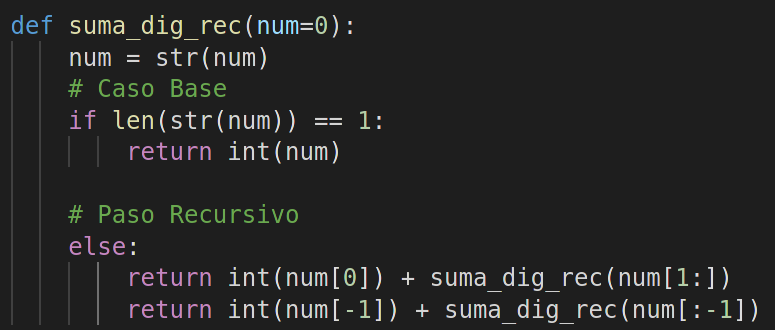

## Factorial Memoizado

Codigo original: https://nbviewer.jupyter.org/github/fferegrino/nbstuff/blob/master/Memoization.ipynb

In [56]:


def fib(n):
    if n == 0 or n == 1:
        return 1
    return fib(n-1) + fib(n-2)



def fib_mem(n):
    # Casos base
    storage = dict([
      (0, 1), 
      (1, 1)
    ])

    if n in storage:
        return storage[n]
    storage[n] = fib(n-1) + fib(n-2)
    return storage[n]

In [60]:
%%time
result = fib(40)
print(result)

165580141
CPU times: user 46.2 s, sys: 108 ms, total: 46.3 s
Wall time: 46.5 s


In [59]:
# Memoizado
%%time
result = fib_mem(40)
print(result)

165580141
CPU times: user 45.8 s, sys: 75.8 ms, total: 45.9 s
Wall time: 46 s
